# Plot model output
### Explore NetCDF output variables produced by a successful model run
See https://github.com/NCAR/ctsm_python_gallery

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
#import pandas as pd

##### Define path to where the NetCDF output is located, combine all files in the directory.

In [2]:
output_path_str = "../data/output/BOR3_2.0.0_output/lnd/hist/"

In [3]:
nc_data = xr.open_mfdataset(output_path_str + '/*.nc', combine='by_coords', decode_times=False)

In [4]:
# Decode time format to prevent bug
new = xr.decode_cf(nc_data)

In [5]:
# Workaround (not doing it creates dependency errors within cftime module)
nc_data["time"] = new.indexes["time"].to_datetimeindex()

/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  


##### Pick a variable name and create a simple plot.

Text(0, 0.5, 'NPP [gC/m^2/s]')

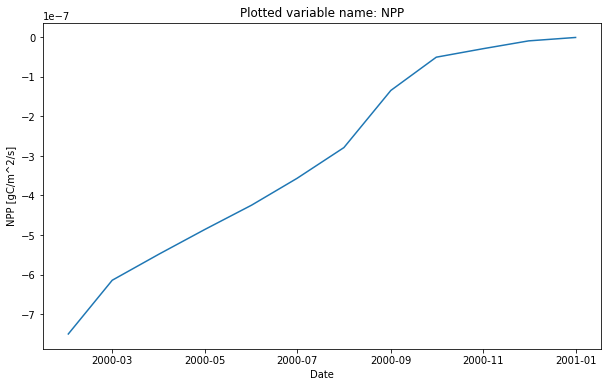

In [9]:
var = nc_data[var_name]

# Create plot
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(nc_data['time'], var)
ax.set_title(f"Plotted variable name: {var_name}")
ax.set_xlabel("Date")
ax.set_ylabel(f"{var_name} [{nc_data[var_name].units}]")
#var.plot()